In [ ]:
#Menghubungkan ke google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd My Drive
%cd Projectskripsi
%cd Dataset

/gdrive/My Drive
/gdrive/My Drive/Projectskripsi
/gdrive/My Drive/Projectskripsi/Dataset


In [ ]:
#Mengestrak Dataset
!unzip Tumorotaak.zip

Archive:  Tumorotaak.zip
   creating: Tumor otaak/
   creating: Tumor otaak/Testing/
   creating: Tumor otaak/Testing/BRAINTUMOR/
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (1).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (10).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (100).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (101).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (102).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (103).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (104).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (105).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (106).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (107).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (108).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (109).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (11).jpg  
  inflating: Tumor otaak/Testing/BRAINTUMOR/Cancer (110

In [ ]:
#Mengimport Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

In [ ]:
#Membuatvariabel
labels = ['BRAINTUMOR', 'NORMAL']
img_size = 128
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#MeloadDataset
train = get_training_data('Tumor otaak/Training')
test = get_training_data('Tumor otaak/Testing')
val = get_training_data('Tumor otaak/val')

<ipython-input-5-d1c9700f0a52>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


<Axes: >

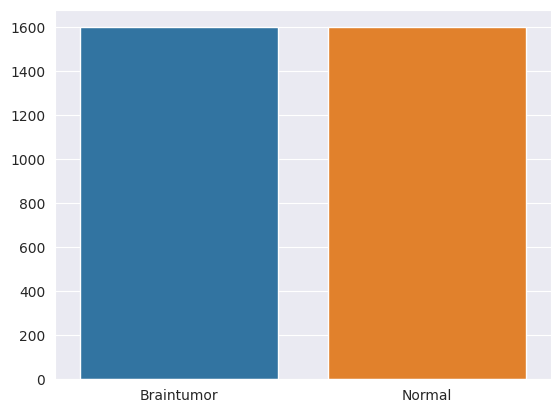

In [ ]:
#Menampilkan Jumlah Datset dalam bentuk diagram batang
import pandas as pd
import seaborn as sns

l = []
for i in train:
    if i[1] == 0:
        l.append("Braintumor")
    else:
        l.append("Normal")

label_counts = pd.Series(l).value_counts()
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index, y=label_counts.values)

Text(0.5, 1.0, 'NORMAL')

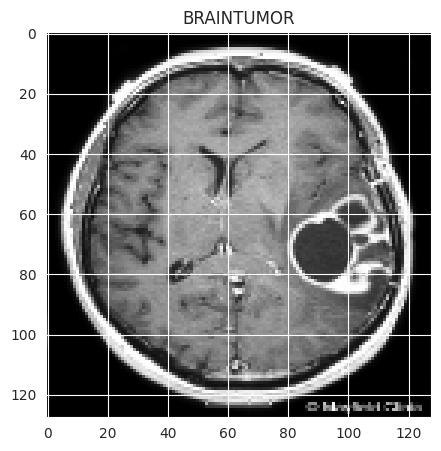

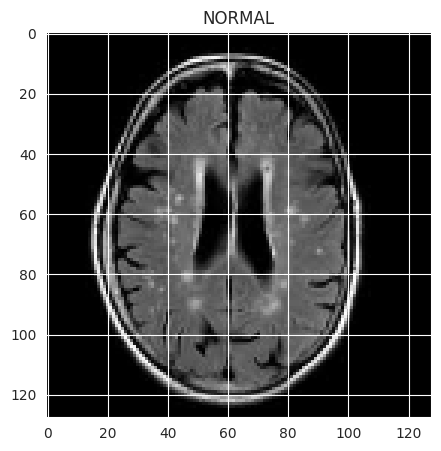

In [ ]:
#Menampilkan sampel data pada masing masing kelas
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
# Menginisialisasi feature dan label dalam variabel array
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
# augmentasi data untuk mencegah overfiting data

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
# Rancangan Layer CNN
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(MaxPool2D((2,2) , strides = 2))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 ))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 ))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 ))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
#Percobaan ke-1
history = model.fit(datagen.flow(x_train,y_train, batch_size = 25) ,epochs = 10 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/10
128/128 [==============================] - 22s 68ms/step - loss: 0.6764 - accuracy: 0.5675 - val_loss: 0.6710 - val_accuracy: 0.5725
Epoch 2/10
128/128 [==============================] - 6s 47ms/step - loss: 0.5894 - accuracy: 0.6806 - val_loss: 0.5270 - val_accuracy: 0.7625
Epoch 3/10
128/128 [==============================] - 8s 63ms/step - loss: 0.5488 - accuracy: 0.7397 - val_loss: 0.4902 - val_accuracy: 0.8050
Epoch 4/10
128/128 [==============================] - 8s 65ms/step - loss: 0.4812 - accuracy: 0.7788 - val_loss: 0.4172 - val_accuracy: 0.8325
Epoch 5/10
128/128 [==============================] - 6s 46ms/step - loss: 0.4436 - accuracy: 0.8016 - val_loss: 0.3859 - val_accuracy: 0.8425
Epoch 6/10
128/128 [==============================] - 8s 63ms/step - loss: 0.4017 - accuracy: 0.8119 - val_loss: 0.4009 - val_accuracy: 0.8050
Epoch 7/10
128/128 [==============================] - 6s 47ms/step - loss: 0.3668 - accuracy: 0.8391 - val_loss: 0.3205 - val_accuracy: 0.857

In [ ]:
# Mendapatkan akurasi dan loss dari train
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 7ms/step - loss: 0.2871 - accuracy: 0.8863
Loss of the model is -  28.71241867542267 %
100/100 [==============================] - 1s 6ms/step - loss: 0.2871 - accuracy: 0.8863
Accuracy of the model is -  88.62500190734863 %


In [ ]:
#Mendapatkan akurasi dan loss dari test
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 6ms/step - loss: 0.4429 - accuracy: 0.8158
Loss of the model is -  44.28998827934265 %
38/38 [==============================] - 0s 6ms/step - loss: 0.4429 - accuracy: 0.8158
Accuracy of the model is -  81.5833330154419 %


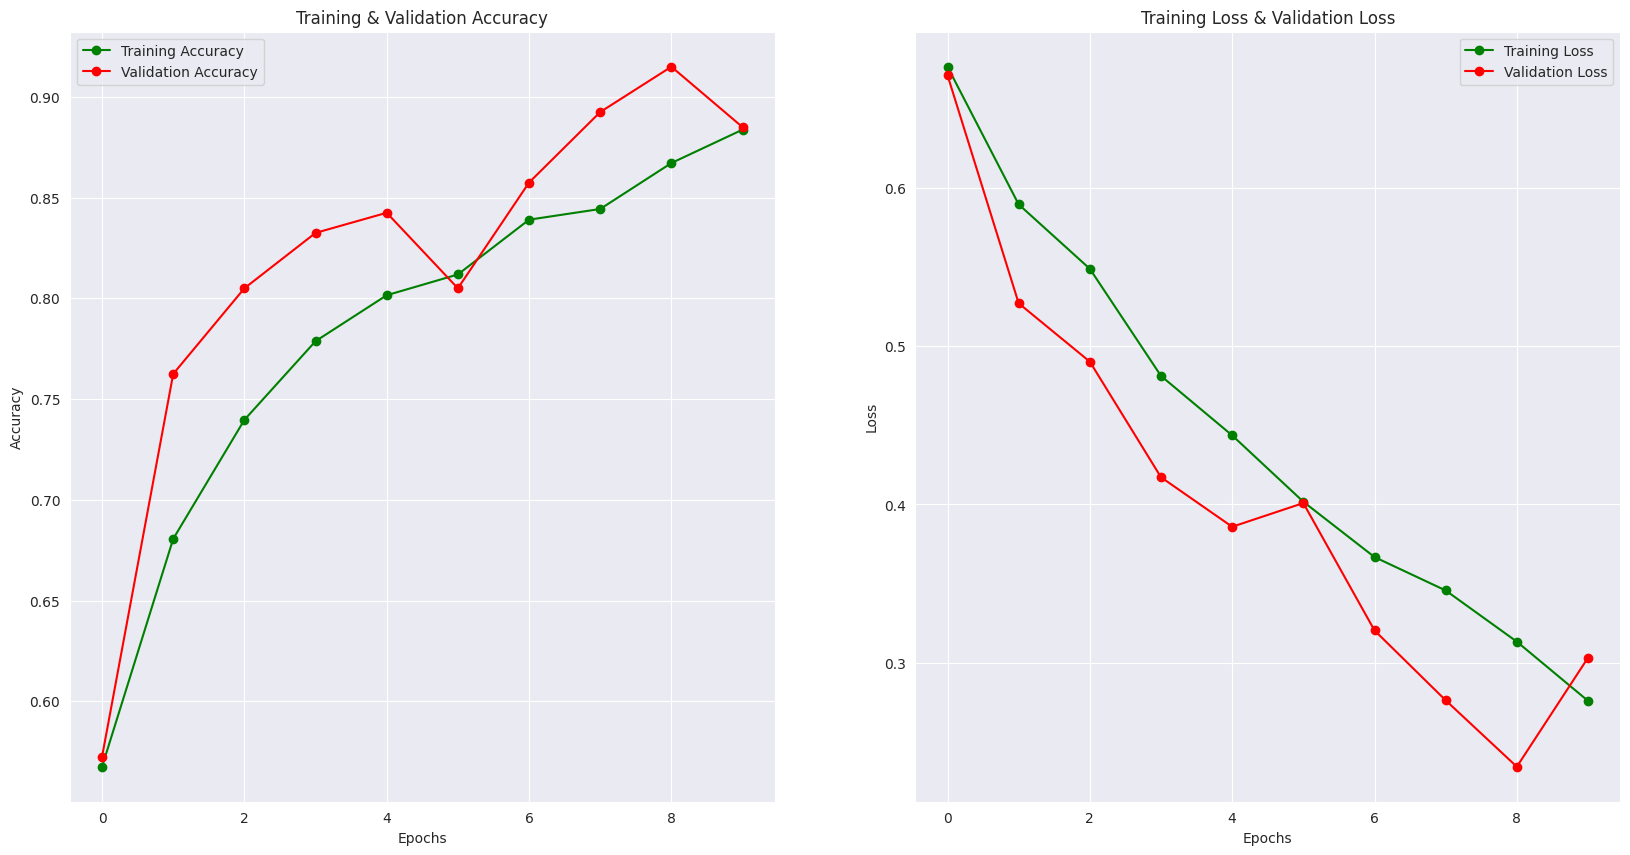

In [ ]:
# Menampilkan diagram garis proses pelatihan
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training Loss & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
#Percobaan ke-2
history = model.fit(datagen.flow(x_train,y_train, batch_size = 25) ,epochs = 20 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/20
128/128 [==============================] - 8s 62ms/step - loss: 0.2712 - accuracy: 0.8828 - val_loss: 0.5276 - val_accuracy: 0.7775
Epoch 2/20
128/128 [==============================] - 6s 48ms/step - loss: 0.2638 - accuracy: 0.8850 - val_loss: 0.3380 - val_accuracy: 0.8575
Epoch 3/20
128/128 [==============================] - 8s 63ms/step - loss: 0.2303 - accuracy: 0.9053 - val_loss: 0.2420 - val_accuracy: 0.8925
Epoch 4/20
128/128 [==============================] - 7s 55ms/step - loss: 0.2030 - accuracy: 0.9181 - val_loss: 0.1672 - val_accuracy: 0.9175
Epoch 5/20
128/128 [==============================] - 8s 65ms/step - loss: 0.1775 - accuracy: 0.9294 - val_loss: 0.1435 - val_accuracy: 0.9325
Epoch 6/20
128/128 [==============================] - 8s 61ms/step - loss: 0.1670 - accuracy: 0.9291 - val_loss: 0.2593 - val_accuracy: 0.8900
Epoch 7/20
128/128 [==============================] - 6s 47ms/step - loss: 0.1623 - accuracy: 0.9406 - val_loss: 0.2529 - val_accuracy: 0.9050

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 6ms/step - loss: 0.0482 - accuracy: 0.9837
Loss of the model is -  4.8218682408332825 %
100/100 [==============================] - 1s 6ms/step - loss: 0.0482 - accuracy: 0.9837
Accuracy of the model is -  98.37499856948853 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 5ms/step - loss: 0.2063 - accuracy: 0.9308
Loss of the model is -  20.630329847335815 %
38/38 [==============================] - 0s 5ms/step - loss: 0.2063 - accuracy: 0.9308
Accuracy of the model is -  93.08333396911621 %


In [ ]:
#Percobaan ke-3
history = model.fit(datagen.flow(x_train,y_train, batch_size = 25) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/30
128/128 [==============================] - 6s 49ms/step - loss: 0.0782 - accuracy: 0.9716 - val_loss: 0.1206 - val_accuracy: 0.9550
Epoch 2/30
128/128 [==============================] - 6s 47ms/step - loss: 0.0840 - accuracy: 0.9703 - val_loss: 0.2191 - val_accuracy: 0.9200
Epoch 3/30
128/128 [==============================] - 8s 62ms/step - loss: 0.0624 - accuracy: 0.9766 - val_loss: 0.1193 - val_accuracy: 0.9625
Epoch 4/30
128/128 [==============================] - 6s 47ms/step - loss: 0.0600 - accuracy: 0.9781 - val_loss: 0.2883 - val_accuracy: 0.9050
Epoch 5/30
128/128 [==============================] - 8s 62ms/step - loss: 0.0566 - accuracy: 0.9841 - val_loss: 0.1719 - val_accuracy: 0.9475
Epoch 6/30
128/128 [==============================] - 6s 47ms/step - loss: 0.0656 - accuracy: 0.9766 - val_loss: 0.1978 - val_accuracy: 0.9325
Epoch 7/30
128/128 [==============================] - 8s 62ms/step - loss: 0.0479 - accuracy: 0.9831 - val_loss: 0.1668 - val_accuracy: 0.9450

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 7ms/step - loss: 0.0173 - accuracy: 0.9941
Loss of the model is -  1.7313925549387932 %
100/100 [==============================] - 1s 8ms/step - loss: 0.0173 - accuracy: 0.9941
Accuracy of the model is -  99.40624833106995 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.9233
Loss of the model is -  32.69170522689819 %
38/38 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.9233
Accuracy of the model is -  92.33333468437195 %


In [ ]:
#Percobaan ke-4
history = model.fit(datagen.flow(x_train,y_train, batch_size = 25) ,epochs = 40 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/40
128/128 [==============================] - 6s 47ms/step - loss: 0.0289 - accuracy: 0.9891 - val_loss: 0.1498 - val_accuracy: 0.9550
Epoch 2/40
128/128 [==============================] - 8s 60ms/step - loss: 0.0340 - accuracy: 0.9875 - val_loss: 0.1583 - val_accuracy: 0.9600
Epoch 3/40
128/128 [==============================] - 6s 46ms/step - loss: 0.0355 - accuracy: 0.9859 - val_loss: 0.1618 - val_accuracy: 0.9550
Epoch 4/40
128/128 [==============================] - 8s 62ms/step - loss: 0.0253 - accuracy: 0.9900 - val_loss: 0.3000 - val_accuracy: 0.9300
Epoch 5/40
128/128 [==============================] - 6s 46ms/step - loss: 0.0314 - accuracy: 0.9881 - val_loss: 0.2786 - val_accuracy: 0.9275
Epoch 6/40
128/128 [==============================] - 8s 61ms/step - loss: 0.0248 - accuracy: 0.9900 - val_loss: 0.2043 - val_accuracy: 0.9325
Epoch 7/40
128/128 [==============================] - 6s 46ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.1744 - val_accuracy: 0.9575

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 7ms/step - loss: 0.0044 - accuracy: 0.9984
Loss of the model is -  0.4433928057551384 %
100/100 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.9984
Accuracy of the model is -  99.84375238418579 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 6ms/step - loss: 0.2029 - accuracy: 0.9475
Loss of the model is -  20.294705033302307 %
38/38 [==============================] - 0s 7ms/step - loss: 0.2029 - accuracy: 0.9475
Accuracy of the model is -  94.74999904632568 %


In [ ]:
#Percobaan ke-5
history = model.fit(datagen.flow(x_train,y_train, batch_size = 25) ,epochs = 50 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/50
128/128 [==============================] - 8s 59ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.2570 - val_accuracy: 0.9475
Epoch 2/50
128/128 [==============================] - 6s 47ms/step - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.1893 - val_accuracy: 0.9675
Epoch 3/50
128/128 [==============================] - 8s 63ms/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.2729 - val_accuracy: 0.9525
Epoch 4/50
128/128 [==============================] - 6s 50ms/step - loss: 0.0186 - accuracy: 0.9931 - val_loss: 0.2341 - val_accuracy: 0.9600
Epoch 5/50
128/128 [==============================] - 6s 46ms/step - loss: 0.0448 - accuracy: 0.9853 - val_loss: 0.1173 - val_accuracy: 0.9725
Epoch 6/50
128/128 [==============================] - 8s 63ms/step - loss: 0.0246 - accuracy: 0.9894 - val_loss: 0.1073 - val_accuracy: 0.9800
Epoch 7/50
128/128 [==============================] - 6s 45ms/step - loss: 0.0170 - accuracy: 0.9931 - val_loss: 0.1809 - val_accuracy: 0.9625

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 6ms/step - loss: 0.0141 - accuracy: 0.9934
Loss of the model is -  1.414332538843155 %
100/100 [==============================] - 1s 9ms/step - loss: 0.0141 - accuracy: 0.9934
Accuracy of the model is -  99.34375286102295 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 8ms/step - loss: 0.5146 - accuracy: 0.9192
Loss of the model is -  51.45983099937439 %
38/38 [==============================] - 0s 7ms/step - loss: 0.5146 - accuracy: 0.9192
Accuracy of the model is -  91.91666841506958 %


In [ ]:
#Percobaan ke-6
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 10 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/10
64/64 [==============================] - 6s 86ms/step - loss: 0.0119 - accuracy: 0.9956 - val_loss: 0.1816 - val_accuracy: 0.9750
Epoch 2/10
64/64 [==============================] - 7s 109ms/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.2714 - val_accuracy: 0.9750
Epoch 3/10
64/64 [==============================] - 6s 95ms/step - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.2761 - val_accuracy: 0.9725
Epoch 4/10
64/64 [==============================] - 7s 116ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.2704 - val_accuracy: 0.9675
Epoch 5/10
64/64 [==============================] - 6s 88ms/step - loss: 0.0045 - accuracy: 0.9981 - val_loss: 0.2996 - val_accuracy: 0.9775
Epoch 6/10
64/64 [==============================] - 6s 89ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.2442 - val_accuracy: 0.9725
Epoch 7/10
64/64 [==============================] - 7s 113ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.2475 - val_accuracy: 0.9750
Epoch 8/10

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 7ms/step - loss: 0.0038 - accuracy: 0.9994
Loss of the model is -  0.3754411358386278 %
100/100 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.9994
Accuracy of the model is -  99.93749856948853 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 7ms/step - loss: 0.2744 - accuracy: 0.9550
Loss of the model is -  27.44239568710327 %
38/38 [==============================] - 0s 7ms/step - loss: 0.2744 - accuracy: 0.9550
Accuracy of the model is -  95.49999833106995 %


In [ ]:
#Percobaan ke-7
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 20 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/20
64/64 [==============================] - 7s 106ms/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.2905 - val_accuracy: 0.9750
Epoch 2/20
64/64 [==============================] - 8s 122ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.1338 - val_accuracy: 0.9850
Epoch 3/20
64/64 [==============================] - 6s 89ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.0987 - val_accuracy: 0.9850
Epoch 4/20
64/64 [==============================] - 7s 112ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.1366 - val_accuracy: 0.9750
Epoch 5/20
64/64 [==============================] - 6s 90ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.2038 - val_accuracy: 0.9750
Epoch 6/20
64/64 [==============================] - 8s 119ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.1804 - val_accuracy: 0.9750
Epoch 7/20
64/64 [==============================] - 6s 89ms/step - loss: 0.0048 - accuracy: 0.9978 - val_loss: 0.2144 - val_accuracy: 0.9750
Epoch 8/2

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9991
Loss of the model is -  0.2485636854544282 %
100/100 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9991
Accuracy of the model is -  99.90624785423279 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 6ms/step - loss: 0.2717 - accuracy: 0.9558
Loss of the model is -  27.174112200737 %
38/38 [==============================] - 0s 6ms/step - loss: 0.2717 - accuracy: 0.9558
Accuracy of the model is -  95.58333158493042 %


In [ ]:
#Percobaan ke-8
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/30
64/64 [==============================] - 6s 92ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.2113 - val_accuracy: 0.9750
Epoch 2/30
64/64 [==============================] - 6s 87ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.1095 - val_accuracy: 0.9850
Epoch 3/30
64/64 [==============================] - 6s 99ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.2393 - val_accuracy: 0.9675
Epoch 4/30
64/64 [==============================] - 6s 99ms/step - loss: 0.0087 - accuracy: 0.9959 - val_loss: 0.1224 - val_accuracy: 0.9775
Epoch 5/30
64/64 [==============================] - 6s 86ms/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.2413 - val_accuracy: 0.9725
Epoch 6/30
64/64 [==============================] - 8s 123ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.2677 - val_accuracy: 0.9750
Epoch 7/30
64/64 [==============================] - 6s 86ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.1794 - val_accuracy: 0.9775
Epoch 8/30
6

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 6ms/step - loss: 0.0078 - accuracy: 0.9975
Loss of the model is -  0.7822883315384388 %
100/100 [==============================] - 1s 6ms/step - loss: 0.0078 - accuracy: 0.9975
Accuracy of the model is -  99.75000023841858 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 6ms/step - loss: 0.5056 - accuracy: 0.9375
Loss of the model is -  50.562477111816406 %
38/38 [==============================] - 0s 5ms/step - loss: 0.5056 - accuracy: 0.9375
Accuracy of the model is -  93.75 %


In [ ]:
#Percobaan ke-9
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 40 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/40
64/64 [==============================] - 6s 94ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.2554 - val_accuracy: 0.9675
Epoch 2/40
64/64 [==============================] - 6s 89ms/step - loss: 0.0156 - accuracy: 0.9962 - val_loss: 0.1218 - val_accuracy: 0.9750
Epoch 3/40
64/64 [==============================] - 7s 107ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.1352 - val_accuracy: 0.9825
Epoch 4/40
64/64 [==============================] - 7s 115ms/step - loss: 0.0108 - accuracy: 0.9972 - val_loss: 0.1840 - val_accuracy: 0.9675
Epoch 5/40
64/64 [==============================] - 6s 89ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.2029 - val_accuracy: 0.9700
Epoch 6/40
64/64 [==============================] - 7s 113ms/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.1750 - val_accuracy: 0.9775
Epoch 7/40
64/64 [==============================] - 6s 87ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1524 - val_accuracy: 0.9850
Epoch 8/40

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 6ms/step - loss: 0.0173 - accuracy: 0.9947
Loss of the model is -  1.7298171296715736 %
100/100 [==============================] - 1s 6ms/step - loss: 0.0173 - accuracy: 0.9947
Accuracy of the model is -  99.46874976158142 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 5ms/step - loss: 0.3895 - accuracy: 0.9200
Loss of the model is -  38.95004391670227 %
38/38 [==============================] - 0s 6ms/step - loss: 0.3895 - accuracy: 0.9200
Accuracy of the model is -  92.00000166893005 %


In [ ]:
#Percobaan ke-10
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 50 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/50
64/64 [==============================] - 7s 106ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.1564 - val_accuracy: 0.9775
Epoch 2/50
64/64 [==============================] - 6s 97ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.2064 - val_accuracy: 0.9725
Epoch 3/50
64/64 [==============================] - 7s 116ms/step - loss: 0.0063 - accuracy: 0.9972 - val_loss: 0.2700 - val_accuracy: 0.9800
Epoch 4/50
64/64 [==============================] - 6s 86ms/step - loss: 0.0151 - accuracy: 0.9959 - val_loss: 0.1335 - val_accuracy: 0.9825
Epoch 5/50
64/64 [==============================] - 7s 116ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.3210 - val_accuracy: 0.9650
Epoch 6/50
64/64 [==============================] - 6s 88ms/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.2929 - val_accuracy: 0.9675
Epoch 7/50
64/64 [==============================] - 7s 103ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.2088 - val_accuracy: 0.9775
Epoch 8/5

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

100/100 [==============================] - 1s 7ms/step - loss: 0.0054 - accuracy: 0.9987
Loss of the model is -  0.5435560364276171 %
100/100 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.9987
Accuracy of the model is -  99.87499713897705 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

38/38 [==============================] - 0s 9ms/step - loss: 0.2411 - accuracy: 0.9592
Loss of the model is -  24.11443293094635 %
38/38 [==============================] - 0s 9ms/step - loss: 0.2411 - accuracy: 0.9592
Accuracy of the model is -  95.91666460037231 %


In [ ]:
# Prediksi berdasarkan data set
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
predictions[:100]


38/38 [==============================] - 1s 7ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# Menampilkan hasil precision, recall dan f1 score
print(classification_report(y_test, predictions, target_names = ['Braintumor','Normal']))

              precision    recall  f1-score   support

  Braintumor       0.95      0.97      0.96       600
      Normal       0.97      0.95      0.96       600

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [ ]:
# Menampilkan hasil prediksi dengan confusion matriks
cm = confusion_matrix(y_test,predictions)
cm

array([[583,  17],
       [ 32, 568]])

In [ ]:
# Menampilkan dalam bentuk diagram
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

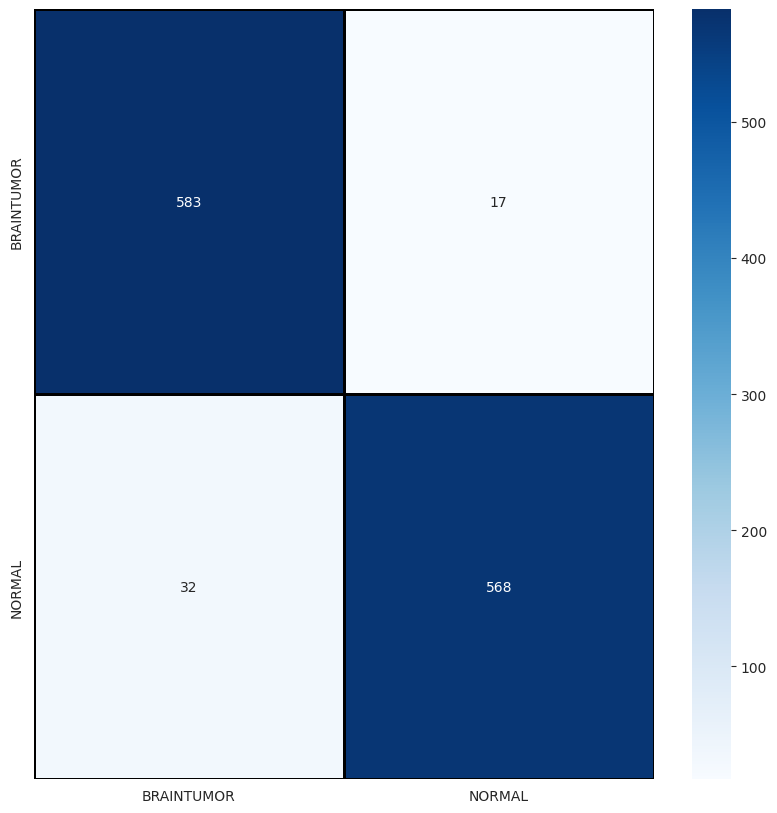

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
# Menampilkan prediksi dengan sampel
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

<ipython-input-51-4fe8ec2b3759>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


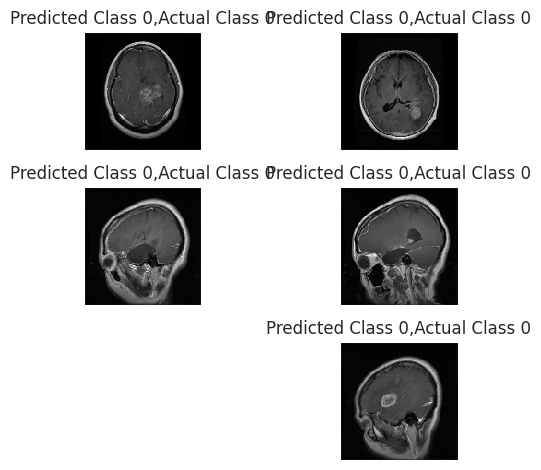

In [ ]:
# Prediksi Benar
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(128,128), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1



<ipython-input-52-3f78469589f1>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


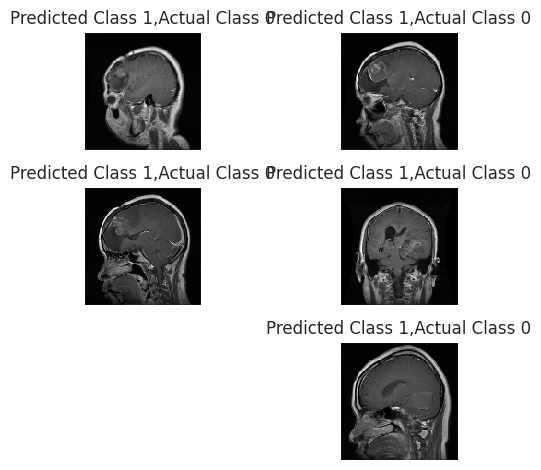

In [ ]:
#Prediksi Salah
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(128,128), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

